## Attempts Will Be Made

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

X_train = pd.read_csv('../src/Xtrain.csv')
y_train = pd.read_csv('../src/ytrain.csv')

In [3]:
X_train.shape, y_train.shape

((16197, 19), (16197, 1))

In [4]:
X_train.columns, y_train.columns

(Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
        'waterfront', 'view', 'condition', 'grade', 'sqft_above',
        'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
        'sqft_living15', 'sqft_lot15'],
       dtype='object'),
 Index(['price'], dtype='object'))

In [4]:
X_train.dtypes, X_train.isna().sum()

(date              object
 bedrooms           int64
 bathrooms        float64
 sqft_living        int64
 sqft_lot           int64
 floors           float64
 waterfront       float64
 view             float64
 condition          int64
 grade              int64
 sqft_above         int64
 sqft_basement     object
 yr_built           int64
 yr_renovated     float64
 zipcode            int64
 lat              float64
 long             float64
 sqft_living15      int64
 sqft_lot15         int64
 dtype: object,
 date                0
 bedrooms            0
 bathrooms           0
 sqft_living         0
 sqft_lot            0
 floors              0
 waterfront       1756
 view               49
 condition           0
 grade               0
 sqft_above          0
 sqft_basement       0
 yr_built            0
 yr_renovated     2879
 zipcode             0
 lat                 0
 long                0
 sqft_living15       0
 sqft_lot15          0
 dtype: int64)

In [6]:
##Joining dataframes in order to drop values, then split them back up

training_df = pd.concat([y_train, X_train], axis = 1)
training_df

,price,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,529000.0,3/4/2015,3,2.50,1880,4499,2.0,0.0,0.0,3,8,1880,0.0,1993,0.0,98029,47.5664,-121.999,2130,5114
1,253000.0,10/7/2014,3,2.50,2020,6564,1.0,0.0,0.0,3,7,1310,710.0,1994,0.0,98042,47.3545,-122.158,1710,5151
2,745000.0,1/16/2015,5,4.00,4720,493534,2.0,0.0,0.0,5,9,3960,760.0,1975,0.0,98027,47.4536,-122.009,2160,219542
3,545000.0,3/30/2015,2,2.00,1430,3880,1.0,0.0,0.0,4,7,1430,0.0,1949,0.0,98117,47.6844,-122.392,1430,3880
4,390000.0,10/14/2014,3,2.25,2270,32112,1.0,0.0,0.0,4,8,1740,530.0,1980,0.0,98042,47.3451,-122.094,2310,41606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16192,440000.0,9/15/2014,3,2.50,2230,5800,2.0,0.0,0.0,3,7,2230,0.0,2004,0.0,98065,47.5308,-121.847,2230,6088
16193,572000.0,10/2/2014,4,2.75,2770,3852,2.0,0.0,0.0,3,8,2770,0.0,2014,NaN,98178,47.5001,-122.232,1810,5641
16194,299800.0,7/21/2014,4,1.50,1530,9000,1.0,0.0,0.0,4,6,1530,0.0,1976,0.0,98014,47.6492,-121.908,1520,8500
16195,245000.0,6/20/2014,1,0.75,380,15000,1.0,0.0,0.0,3,5,380,0.0,1963,0.0,98168,47.4810,-122.323,1170,15000


In [6]:
##Calculated the percent of waterfront homes in the existing data to determine what to do with NaN vals
##Because they accounted for less than 1 percent of properties, I replaced NaN values with 0. 

len(training_df[training_df['waterfront'] == 1.0]), len(training_df[training_df['waterfront'] == 0.0])
percent_waterfront = 111/14330
percent_waterfront, training_df['waterfront'].isna().sum()

(0.007745987438939288, 1756)

In [7]:
training_df['waterfront'].replace(np.nan, 0, inplace = True)

In [8]:
##Did the same thing with renovations but turned it into a categorical variable - Only 550 or so had reported renovations,
## So reported renovations became 1, unreported or reported as 0.0 all became 0

training_df['yr_renovated'].replace(np.nan, 0, inplace = True)

training_df['renovated'] = np.where((training_df['yr_renovated'] > 0.0), 1, 0)

training_df['renovated'].sum()/len(training_df['renovated'])

0.0337716861147126

In [9]:
## Converted str dates to datetime objects

x_date = pd.DataFrame(pd.to_datetime(training_df['date'], format='%m/%d/%Y'))

In [10]:
training_df['date'] = x_date

In [11]:
training_df.isna().sum()

price             0
date              0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view             49
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
renovated         0
dtype: int64

In [12]:
training_df.drop(columns = 'yr_renovated', axis = 1, inplace = True)
training_df.dropna(inplace = True)

In [13]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16148 entries, 0 to 16196
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           16148 non-null  datetime64[ns]
 1   bedrooms       16148 non-null  int64         
 2   bathrooms      16148 non-null  float64       
 3   sqft_living    16148 non-null  int64         
 4   sqft_lot       16148 non-null  int64         
 5   floors         16148 non-null  float64       
 6   waterfront     16148 non-null  float64       
 7   view           16148 non-null  float64       
 8   condition      16148 non-null  int64         
 9   grade          16148 non-null  int64         
 10  sqft_above     16148 non-null  int64         
 11  sqft_basement  16148 non-null  object        
 12  yr_built       16148 non-null  int64         
 13  zipcode        16148 non-null  int64         
 14  lat            16148 non-null  float64       
 15  long           1614

In [14]:
x_date = ['date']
x_cat  = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'zipcode', 'renovated']
x_cont = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

y_cont = ['price']

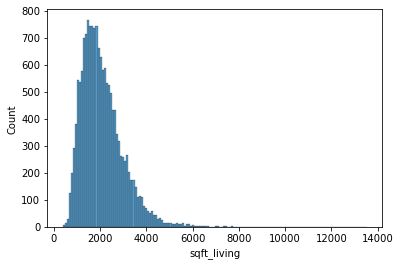

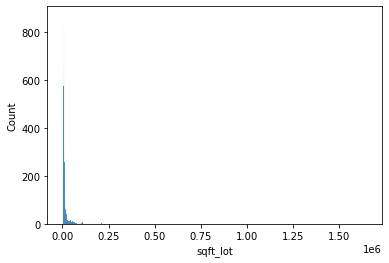

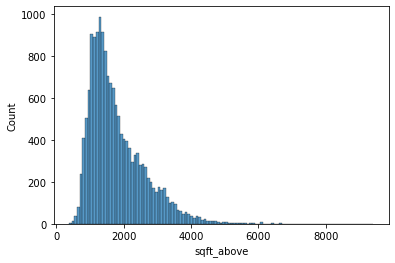

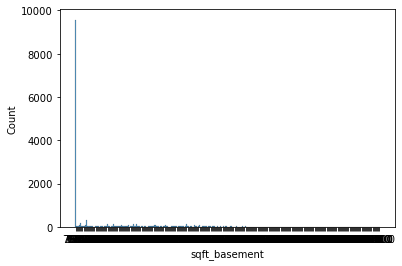

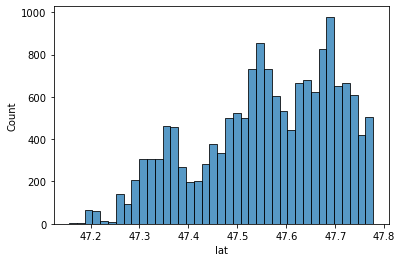

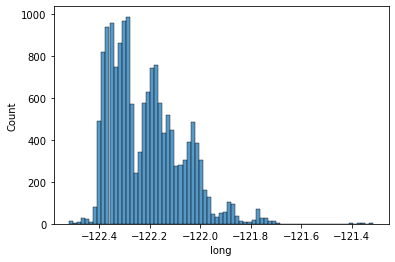

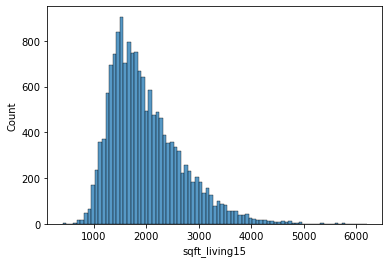

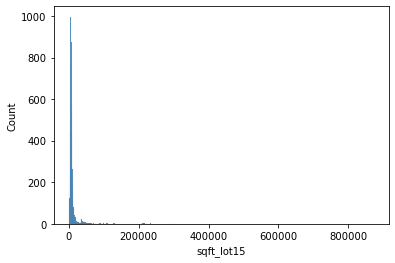

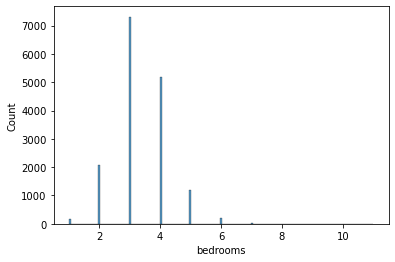

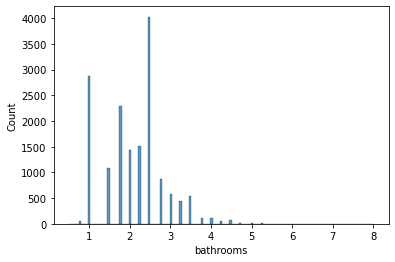

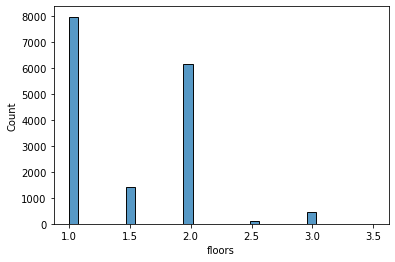

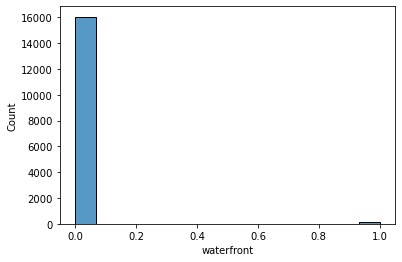

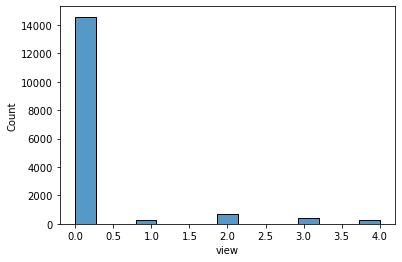

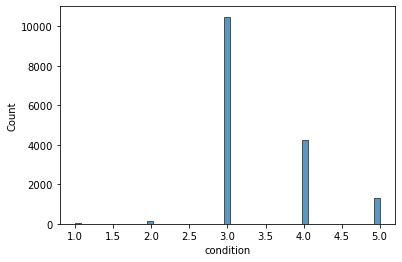

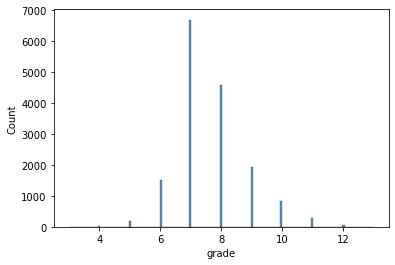

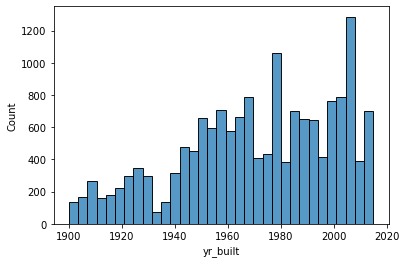

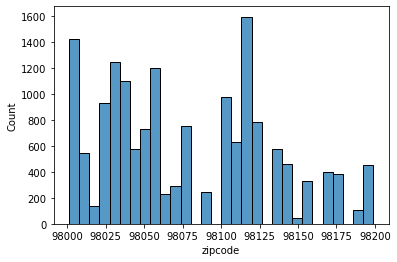

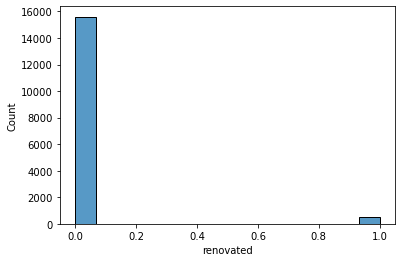

In [15]:
## Plotted distributions for continuous variables 
for cat in x_cont:
    fig, ax = plt.subplots()
    sns.histplot(training_df[cat])

##Plotted categorical variables

for cat in x_cat:
    fig, ax = plt.subplots()
    sns.histplot(training_df[cat])

In [16]:
##Selecting the features I want to use
x_date = x_date
x_cat = ['bedrooms', 'bathrooms', 'waterfront', 'view', 'condition', 'grade', 'zipcode', 'renovated']
x_cont = ['sqft_living', 'sqft_lot', 'lat', 'long', 'sqft_living15']
y_cont = y_cont

<AxesSubplot:xlabel='price', ylabel='Count'>

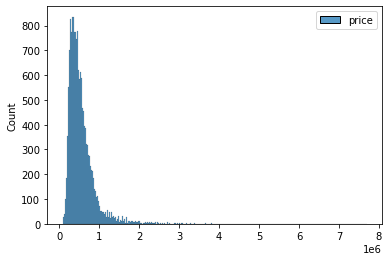

In [17]:
sns.histplot(training_df['price'])

In [18]:
##OHE on selected categoricals
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop = 'first')
x_cat_enc = ohe.fit_transform(X_train[x_cat])

x_cat_enc_df = pd.DataFrame(x_cat_enc)


In [19]:
#log transform on sqft variables
log_sqft_living = np.log(X_train['sqft_living'])
log_sqft_lot = np.log(X_train['sqft_lot'])
log_sqft_living15 = np.log(X_train['sqft_living15'])

log_y = np.log(y_train['price'])

#standardizing lat and long to coordinates
small_x = np.array(np.cos(X_train['lat']) * np.cos(X_train['long']))
small_y = np.array(pd.DataFrame(np.cos(X_train['lat']) * np.sin(X_train['long'])))
small_z = np.array(pd.DataFrame(np.sin(X_train['lat'])))


##Power Transform on continuous variables
from sklearn.preprocessing import PowerTransformer

power = PowerTransformer()

power_sqft_living = power.fit_transform(np.array(log_sqft_living).reshape(-1,1)).flatten()
power_sqft_lot = power.fit_transform(np.array(log_sqft_lot).reshape(-1,1)).flatten()
power_sqft_living15 = power.fit_transform(np.array(log_sqft_living15).reshape(-1,1)).flatten()

power_y_train = power.fit_transform(np.array(log_y).reshape(-1,1)).flatten()

##Assembly of final DF
final_df = pd.DataFrame([])

final_df['price'] = power_y_train
final_df['sqft_living'] = power_sqft_living
final_df['sqft_lot'] = power_sqft_lot
final_df['sqft_living15'] = power_sqft_living

final_df = pd.concat([final_df, x_cat_enc_df], axis = 1)

(16197, 1)

In [23]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [26]:
# instantiate a kfold object and specify number of splits

kf = KFold(5) ## 4 to 1 ratio of train to test

# designate 5 folds for each split

# loop through each fold
kf.get_n_splits(X_train)
val_r2 = []


#for train_ind, val_ind in kf.split(X_train):
    # logistic regression performed for each fold
#    logreg = LogisticRegression()
    # instantiate a scaler for each fold
#    ss = StandardScaler()
    # using the indices, create the split associated with each loop
#    X_tt, y_tt = X_train[train_ind], y_train[train_ind]
#    X_val, y_val = X_train[val_ind], y_train[val_ind]
    # fit transform the scaler on tt
#    X_tt_scaled = ss.fit_transform(X_tt)
    # fit model on tt
#    logreg.fit(X_tt_scaled, y_tt)
    # score both training and validation
    
#    X_val_scaled = ss.transform(X_val)
#    val_r2.append(logreg.score(X_val_scaled, y_val))